# *INTERPOLACIÓN LINEAL, DE LAGRANGE Y MULTI VARIABLE*

## 1) INTERPOLACIÓN LINEAL

## A) DEMOSTRACIÓN GEOMÉTRICA.

#### La forma más simple de interpolacion es la llamada Intrerpolación Lineal. Este tipo de interpolación consiste en unir dos puntos asociados con datos con una linea recta como se muestra en la figura:

![DemoLineal](https://user-images.githubusercontent.com/47722525/78728244-75b35480-78fc-11ea-9557-e824e2a3a310.png)

## B) FÓRMULA MATEMÁTICA.

![FormInterLin](https://user-images.githubusercontent.com/47722525/78728864-22420600-78fe-11ea-9657-2a58222b41f1.png)

## C) DIAGRAMA DE FLUJO DE LA INTERPOLACIÓN LINEAL.

![DF_Lineal](https://user-images.githubusercontent.com/47722525/78728903-3b4ab700-78fe-11ea-801c-5315a2d3d883.png)

## D) PROGRAMACIÓN DE LA INTERPOLACIÓN LINEAL.

In [1]:
# Función
def Inter_Lineal(xo,x1,yo,y1,xx):
    '''
    (xo,x1,yo,y1,xx) -> Interpolación
    
    Devuelve la interpolación lineal dados dos puntos.

    Inputs:
    (xo,yo) = Coordenadas del primer punto.
    (x1,y1) = Coordenadas del segundo punto.
    xx = valor que se quiere estimar.
    
    Output:
    Valor estimado en la interpolación.
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    m1 = ((xx-x1)/(xo-x1))
    m2 = ((xx-xo)/(x1-xo))
    return m1*yo + m2*y1

## E) APLICACIÓN DE LA INTERPOLACIÓN LINEAL A LA HIDRÁULICA.

### EJEMPLO 1.- CONCENTRACIÓN DE OXÍGENO.

### _Los siguentes datos definen la concentración de oxígeno disuelto a nivel del mar para agua dulce como función de la temperatura:_

|  T, °C | O, mg/L|
|:------:|:------:|
|  0     | 14.621 |
|  8     | 11.483 |
|  16    |  9.870 |
|  24    |  8.418 |
|  32    |  7.305 |
|  40    |  6.413 |

### _Estime o(27°C) usando interpolación lineal. El resultado exacto es 7.986 mg/L._

### SOLUCIÓN.

### a) Datos:

In [3]:
xo = 24    # 
yo = 8.418 ## Coordenadas del primer punto

x1 = 32    #
y1 = 7.305 ## Coordenadas del segundo punto

xx = 27    # Valor a estimar

### b) Resultados:

In [4]:
o_27 = Inter_Lineal(xo,x1,yo,y1,xx)
err = round(abs((7.986-o_27)*100/7.986),3)
print('La concentración de oxigeno para una temperatura de 27° es:',o_27,'mg/L')
print('Esta aproximación tiene un error del:',err, '% con respecto al valor real de 7.986 mg/L')

La concentración de oxigeno para una temperatura de 27° es: 8.000625 mg/L
Esta aproximación tiene un error del: 0.183 % con respecto al valor real de 7.986 mg/L


## 2) INTERPOLACIÓN DE LAGRANGE

## A) DEDUCCIÓN.

![DemoLagrange](https://user-images.githubusercontent.com/47722525/78729089-b90ec280-78fe-11ea-919c-e25440a275bb.png)

## B) FÓRMULA MATEMÁTICA.

![FormLagrange](https://user-images.githubusercontent.com/47722525/78729124-d5aafa80-78fe-11ea-8a10-a9b851fbe93b.png)

## C) DIAGRAMA DE FLUJO DE LA INTERPOLACIÓN DE LAGRANGE.

![DiagFlujo](https://user-images.githubusercontent.com/47722525/78729165-f5dab980-78fe-11ea-948c-ec1ab4a37ca4.png)

## D) PROGRAMACIÓN DE LA INTERPOLACIÓN DE LAGRANGE.

In [7]:
def Inter_Lagrange(X,Y,xx):
    '''
    (X,Y,xx) -> Interpolación
    
    Devuelve el valor estimado usando interpolación de lagrange dados "n" puntos.

    Inputs:
    X = Vector de abcisas.
    Y = Vector de odenadas.
    xx = valor que se quiere estimar.
    
    Output:
    Valor estimado en la interpolación.
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    n = len(X)
    suma = 0
    for i in range(n):
        Lag = Y[i]
        for j in range(n):
            if i!=j:
                Lag = Lag*(xx-X[j])/(X[i]-X[j])
        suma += Lag
    return suma

## E) APLICACIÓN DE LA INTERPOLACIÓN LINEAL A LA HIDRÁULICA.

### EJEMPLO 2.- CONCENTRACIÓN DE OXÍGENO.

### _Resuelva el ejercicio 1 usando interpolación de Lagrange._

### SOLUCIÓN.

### a) Datos:

In [8]:
X = [0,8,16,24,32,40]
Y = [14.621,11.483,9.870,8.418,7.305,6.413]
xx = 27 # Valor a estimar

### b) Resultados:

In [9]:
o_27L = round(Inter_Lagrange(X,Y,xx),3)
err = round(abs((7.986-o_27L)*100/7.986),3)
print('La concentración de oxigeno para una temperatura de 27° es:',o_27L,'mg/L')
print('Esta aproximación tiene un error del:',err, '% con respecto al valor real de 7.986 mg/L')

La concentración de oxigeno para una temperatura de 27° es: 7.942 mg/L
Esta aproximación tiene un error del: 0.551 % con respecto al valor real de 7.986 mg/L


### c) Gráfica:

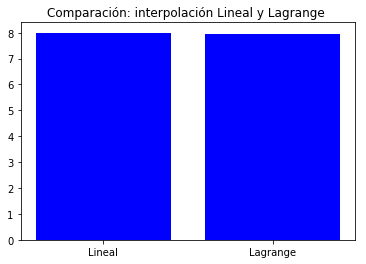

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.title(u'Comparación: interpolación Lineal y Lagrange ') # Figure
datos = [o_27,o_27L]
X = np.arange(2)
plt.bar(X, datos, color = "b")
plt.xticks(X, ["Lineal","Lagrange"])
plt.show()

#### Donde observamos que ambos valores varían muy poco.

## 3) INTERPOLACIÓN MULTIDIMENSIONAL(USANDO FUNCIÓN LINEAL Y POLINOMINAL).

### La interpolacion bidimencional sirve para determinar valores intermedios para funciones de dos variables, z = f(xi, yi) si se tienen valores de cuatro  puntos : f(x2,y1), f(x1,y2) y f(x2, y2) se desea interpolar entre estos puntos para estimar el valor de un punto intermedio f(xi,yi). 

## 3a) INTERPOLACIÓN BILINEAL.

## A) DEMOSTRACIÓN GEOMÉTRICA.

### Si se usa una función lineal, el resultado es un plano que conecta los puntos como en la siguiente figura:

![FigBil](https://user-images.githubusercontent.com/47722525/78729431-a052dc80-78ff-11ea-8c5e-70c59837fd41.png)

### tales funciones se conocen como bilineales. En la siguiente figura se ilustra una forma sencilla de desarrollar la función bilianeal:

![FigBilPlano](https://user-images.githubusercontent.com/47722525/78729472-bf516e80-78ff-11ea-8e5e-0a2b274f4787.png)

![FigBilinealFinal](https://user-images.githubusercontent.com/47722525/78729501-d6905c00-78ff-11ea-87b8-3e85cacf8c17.png)

## B) FÓRMULA MATEMÁTICA.

![Ecuacion_Bilineal](https://user-images.githubusercontent.com/47722525/78729557-f45dc100-78ff-11ea-9de7-f53da21e1856.png)

## C) DIAGRAMA DE FLUJO DEL LA ECUACIÓN BILINEAL (USANDO POLINOMIO DE LAGANGE DE PRIMER GRADO).

![Diag_Flujo_Bilineal](https://user-images.githubusercontent.com/47722525/78729594-10f9f900-7900-11ea-9164-0544de4ac5da.png)

## D) APLICACIÓN DE LA INTERPOLACIÓN BILINEAL.

### EJEMPLO 3.- ESTIMACIÓN DE LA TEMPERATURA EN UN PUNTO DE UNA PLACA CALENTADA.

### _Se miden temperaturas en varios puntos de una placa calentada. Estime la temperatura en x = 4.3, y = 2.7. La tabla de temperaturas es la que se muestra:_

|   Y/X  |  x = 0 |  x = 2 | x = 4 | x = 6 | x = 8 |
|:------:|:------:|:------:|:-----:|:-----:|:-----:|
|  y = 0 | 100.00 |  90.00 | 80.00 | 70.00 | 60.00 |
|  y = 2 |  85.00 |  64.49 | 53.50 | 48.15 | 50.00 |
|  y = 4 |  70.00 |  48.90 | 38.43 | 35.03 | 40.00 |
|  y = 6 |  55.00 |  38.78 | 30.39 | 27.07 | 30.00 |
|  y = 8 |  40.00 |  35.00 | 30.00 | 25.00 | 20.00 |

### SOLUCIÓN.

### a) Datos:

#### Seleccionamos los puntos mas cercanos al punto (4.3,2.7)

In [12]:
x1 = 4; y1 = 2; z1 = 53.50  #
x2 = 4; y2 = 4; z2 = 38.43  ##
x3 = 6; y3 = 2; z3 = 48.15  ###
x4 = 6; y4 = 4; z4 = 35.03  #### Abscisas arregladas en orden acendente junto con sus respectivas coordenadas 

xx = 4.30 # Valor a estimar en "x"
yy = 2.70 # Valor a estimar en "y"

### b) Resultados:

In [13]:
# Interpolacion con x constante:
x1p = Inter_Lineal(y1,y2,z1,z2,yy)
x2p = Inter_Lineal(y3,y4,z3,z4,yy)

# Interpolacion de los resultados pasados:
zz = Inter_Lineal(x1,x3,x1p,x2p,xx)
print('La temperatura en la placa en las coordenadas (4.30, 2.70) es:',round(zz,2),'°C')

La temperatura en la placa en las coordenadas (4.30, 2.70) es: 47.53 °C


## 3b) INTERPOLACIÓN MULTIPLE POLINOMINAL.

### Más alla de la sencilla interpolación bilineal descrita anteriormente, tambien se pueden usar polinomios de grado más alto para interpolar en dos dimenciones, por ejemplo, usando el polinomio de lagrange.

## A) PROGRAMACIÓN DE LA INTERPOLACIÓN  MULTIPLE USANDO POLINOMIOS DE LAGRANGE (EXPANCIÓN DEL PROGRAMA DE INTERPOLACIÓN BILINEAL).

In [14]:
# Libreria:
import numpy as np

# Función:
def Inter_Multi_Lagrange(Vx, Vy, Mxy, xo, yo):
    '''
    (Vx, Vy, Mxy, xo, yo) -> Interpolación Multiple con polinomios de Lagrange.
    
    Devuelve el valor estimado usando interpolación multiple de lagrange dados "n" puntos (x,y).

    Inputs:
    Vx = Vector de abcisas.
    Vy = Vector de odenadas.
    Mxy = Matriz de relación z = (x,y).
    xo,yo = Coordenada que se quiere estimar.
    
    Output:
    Valor estimado en la interpolación.
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    row = len(Vx)
    YZ = np.zeros((row,2))
    LagraYZ = []
    for i in range(row):
        c = -1
        for j in range(row):
            c+=1
            YZ[c][0] = Vy[j]
            YZ[c][1] = Mxy[j][i]
        Y = YZ[:,0]
        Z = YZ[:,1]
        LagraYZ.append(Inter_Lagrange(Y,Z,yo))
    return Inter_Lagrange(Vx,LagraYZ,xo)
    

## B) APLICACIÓN DE LA INTERPOLACIÓN MULTIPLE POLINOMINAL.

### EJEMPLO 4.- ESTIMACIÓN DE LA TEMPERATURA EN UN PUNTO DE UNA PLACA CALENTADA.

### _Resuelva el ejercicio 3 usando interpolación multiple polinominal._

### SOLUCIÓN.

### a) Datos:

In [15]:
# Libreria
import numpy as np

# Vector de las abscisas
Vx = [0,2,4,6,8]

# Vector de las ordenadas
Vy = [0,2,4,6,8]

# Matriz de relacion de las coordenadas de la placa con su temperatura:
Mxy = [[100,90,80,70,60],[85,64.49,53.5,48.15,50],[70,48.9,38.43,35.03,40],[55,38.78,30.39,27.07,30],[40,35,30,25,20]]

# Coordenadas donde nos intereza saber la temperatura:
xo = 4.3
yo = 2.7

### b) Resultados:

In [16]:
imp = Inter_Multi_Lagrange(Vx, Vy, Mxy, xo, yo)
print('La temperatura en la placa en las coordenadas (4.30, 2.70) es:',round(imp,2),'°C')

La temperatura en la placa en las coordenadas (4.30, 2.70) es: 46.2 °C


### c) Gráfica:

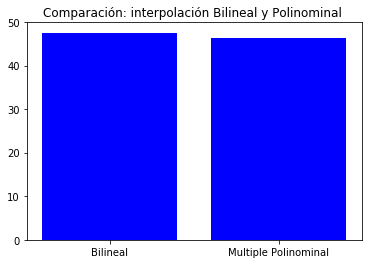

In [17]:
import matplotlib.pyplot as plt
plt.title(u'Comparación: interpolación Bilineal y Polinominal ') # Figure
datos = [zz,imp]
X = np.arange(2)
plt.bar(X, datos, color = "b")
plt.xticks(X, ["Bilineal","Multiple Polinominal"])
plt.show()

#### Donde observamos que ambos valores varían muy poco.